In [1]:
from __future__ import division
import configparser
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
config = configparser.ConfigParser()
my_config = '../Config/default.cfg'
with open(my_config, 'r', encoding='utf-8') as f:
    config.read_file(f)

corpora_base = config.get('DEFAULT', 'corpora_base')

dsgv_home = config.get('DSGV-PATHS', 'dsgv_home')
sys.path.append(dsgv_home + '/Utils')
from utils import icorpus_code, plot_labelled_bb, get_image_filename
from utils import print_timestamped_message
sys.path.append(dsgv_home + '/Preproc')
from sim_preproc import load_imsim, n_most_sim

In [3]:
wac_preproc_path_2018 = dsgv_home + '/Preproc/PreprocOut/'

In [4]:
def plot_image(ax, image_id):
    ax.imshow(plt.imread(get_image_filename(config,
                                            image_id[0], image_id[1])))

def plot_n_images(corpus_id, im_id_list, n_c=2):
    n_r = len(im_id_list) // n_c + len(im_id_list) % n_c
    
    fig, ax = plt.subplots(n_r, n_c, figsize=(20,10))

    for r in range(n_r):
        for c in range(n_c):
            plot_image(ax[r,c], (corpus_id, im_id_list[r*(n_c)+c]))

def invert_dict(indict):
    return {v: k for k, v in indict.items()}

## Method 1: Semantic Similarity (via Annotated Objects)

In [5]:
coco_sem_sim, coco_sem_map = load_imsim(wac_preproc_path_2018 + 'mscoco_sim.npz')
visg_sem_sim, visg_sem_map = load_imsim(wac_preproc_path_2018 + 'visgen_sim.npz')
coco_id2semsim = invert_dict(coco_sem_map)
visg_id2semsim = invert_dict(visg_sem_map)

In [6]:
n_most_sim(coco_sem_sim, coco_sem_map, 10)

[229398, 433715, 329738, 316595]

`n_most_sim` takes a row number as input. This is useful for demonstration purposes, when you don't know an image ID to start from. But normally you would want to get images that are similar to a known image.

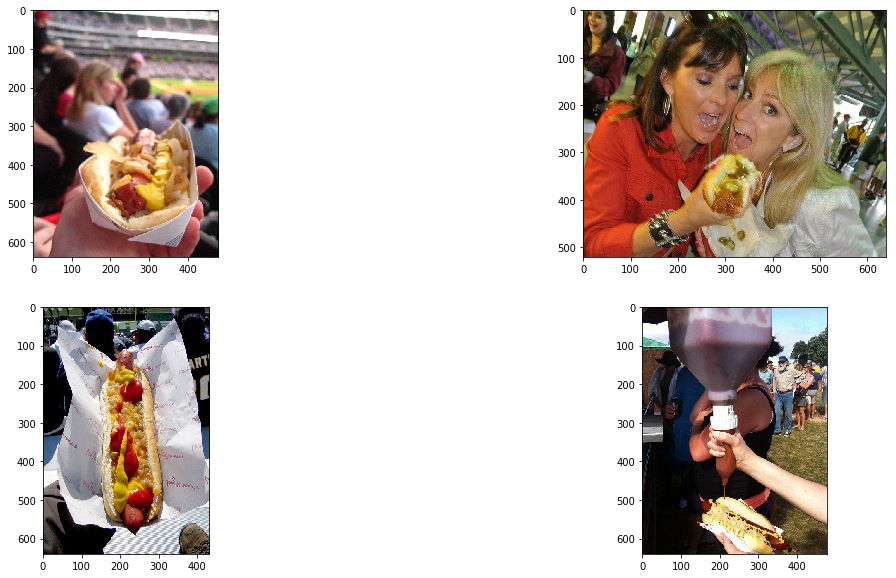

In [7]:
plot_n_images(icorpus_code['mscoco'],
              n_most_sim(coco_sem_sim, coco_sem_map, coco_id2semsim[480023]))

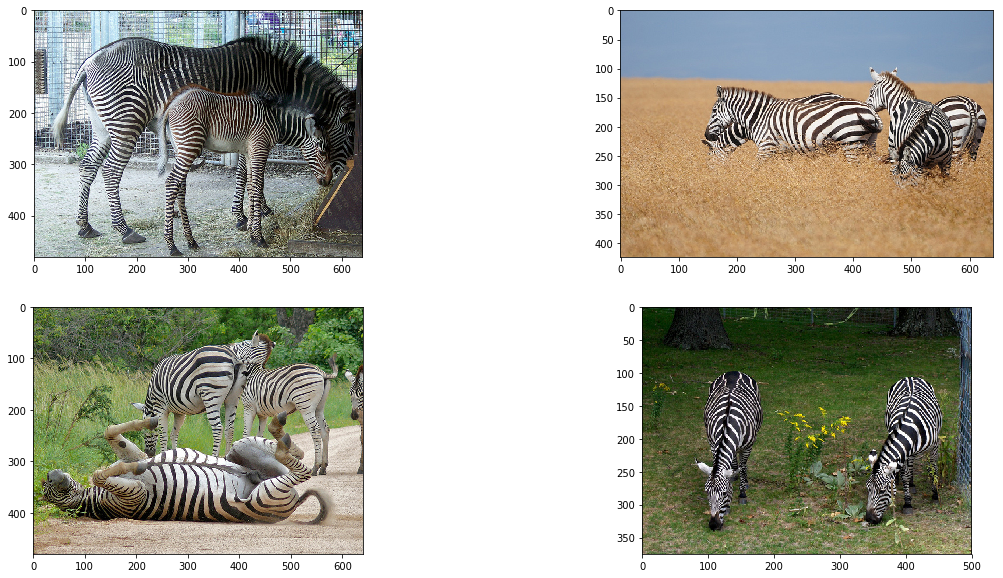

In [8]:
plot_n_images(icorpus_code['mscoco'],
              n_most_sim(coco_sem_sim, coco_sem_map, 200))

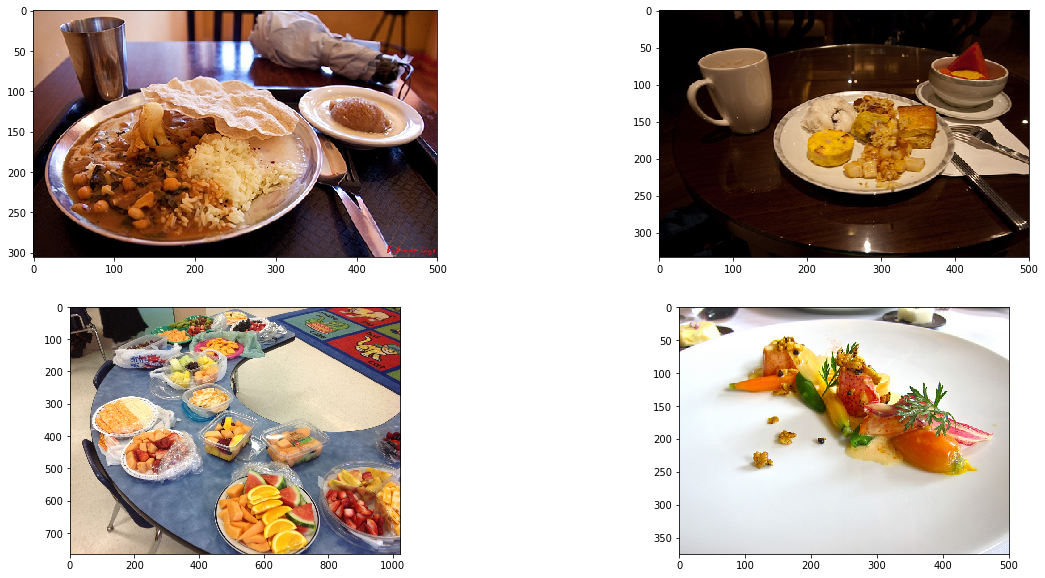

In [9]:
plot_n_images(icorpus_code['visual_genome'],
              n_most_sim(visg_sem_sim, visg_sem_map, 200))

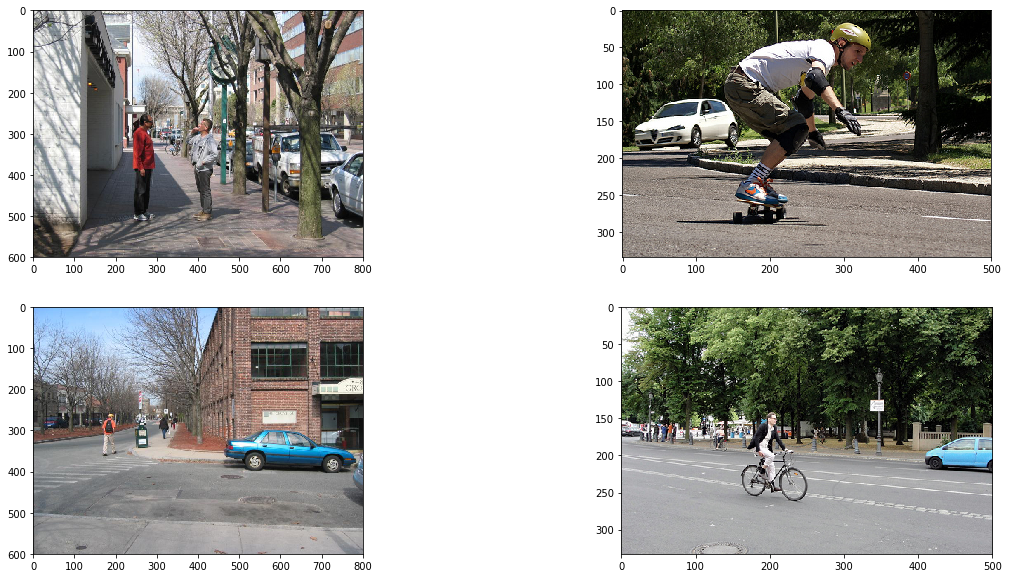

In [10]:
plot_n_images(icorpus_code['visual_genome'],
              n_most_sim(visg_sem_sim, visg_sem_map, visg_id2semsim[1]))

## Method 2: Visual Similarity (via Visual Features)

In [11]:
coco_vis_sim, coco_vis_map = load_imsim(wac_preproc_path_2018 + 'mscoco_vis_sim.npz')
visg_vis_sim, visg_vis_map = load_imsim(wac_preproc_path_2018 + 'visgen_vis_sim.npz')
coco_id2vissim = invert_dict(coco_vis_map)
visg_id2vissim = invert_dict(visg_vis_map)

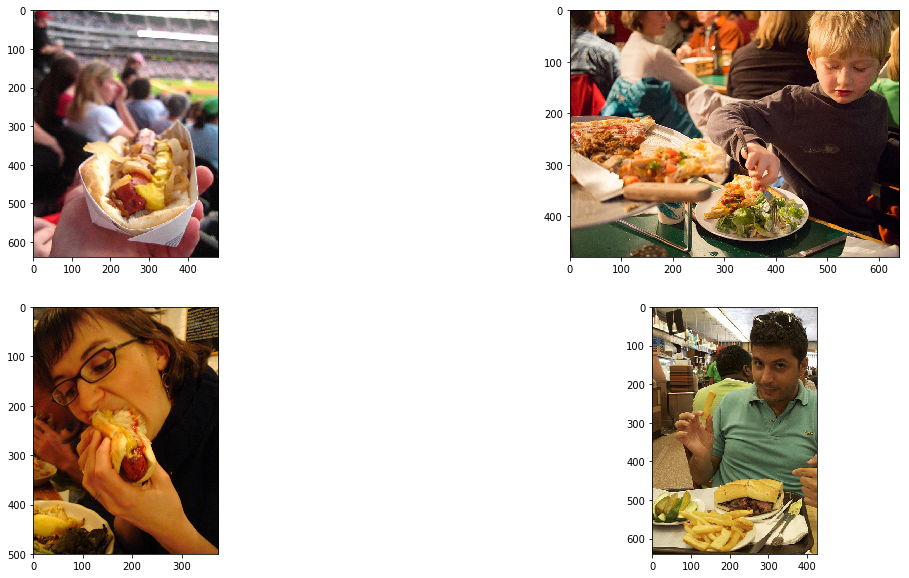

In [12]:
plot_n_images(icorpus_code['mscoco'],
              n_most_sim(coco_vis_sim, coco_vis_map, coco_id2vissim[480023]))

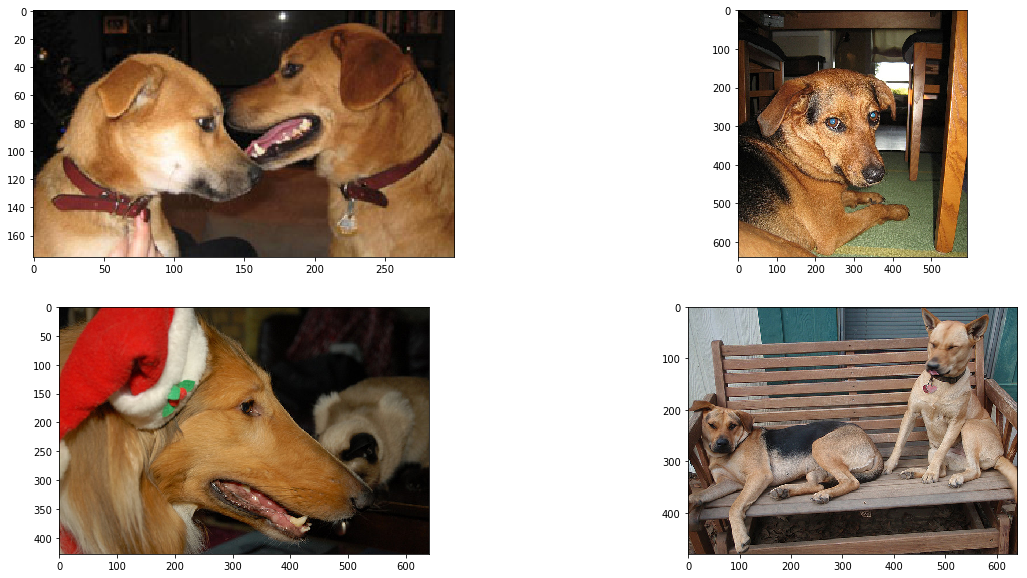

In [13]:
plot_n_images(icorpus_code['mscoco'],
              n_most_sim(coco_vis_sim, coco_vis_map, 200))

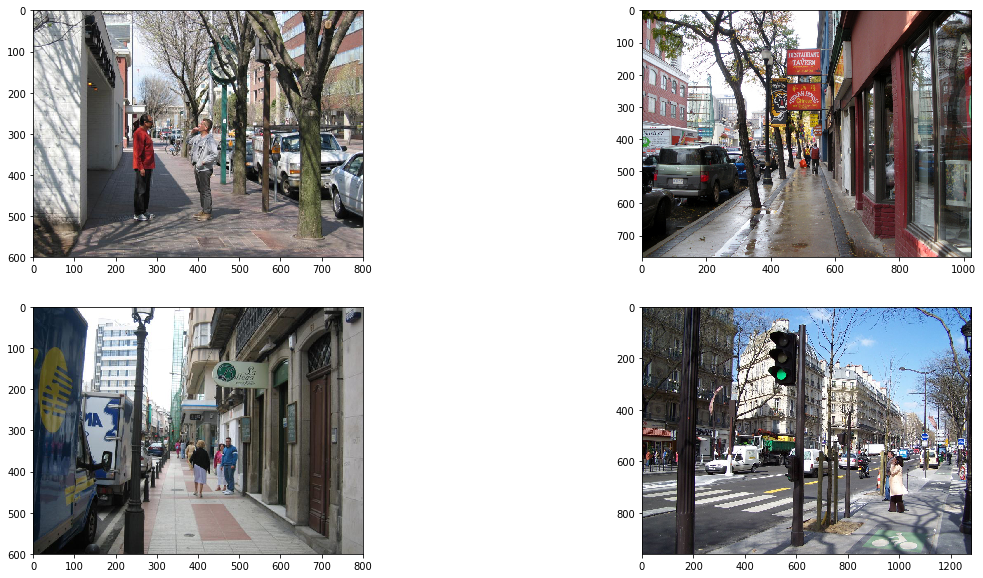

In [14]:
plot_n_images(icorpus_code['visual_genome'],
              n_most_sim(visg_vis_sim, visg_vis_map, visg_id2vissim[1]))